# Конвертация категориальных признаков в числовые и их полезность

In [65]:
import pandas as pd
import seaborn as sns
from sklearn import tree, preprocessing
from sklearn.ensemble import ExtraTreesClassifier
import graphviz

In [46]:
df = pd.read_csv('students.csv')
df_cut = df[['Growth', 'Weight', 'Hair length', 'Children number',
             'Coin', 'Animal', 'Army', 'Sex']].dropna()

df_test = pd.read_csv('students_test.csv')
df_test_cut = df_test[['Growth', 'Weight', 'Hair length', 'Children number',
             'Coin', 'Animal', 'Army', 'Sex']].dropna()

In [47]:
df['Sex']

0      женский
1      мужской
2      мужской
3      женский
4      женский
        ...   
181    женский
182    женский
183    женский
184    женский
185    женский
Name: Sex, Length: 186, dtype: object

In [48]:
coder = preprocessing.LabelEncoder()
coder.fit(df['Sex'])
coder.transform(df['Sex'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [49]:
# Преобразуем все необходимые категориальные признаки
for col in ['Coin', 'Animal', 'Army', 'Sex']:
    coder.fit(df[col])
    df_cut[col] = coder.transform(df_cut[col])
    df_test_cut[col] = coder.transform(df_test_cut[col])

In [50]:
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(df_cut[['Growth', 'Weight', 'Hair length', 'Children number',
             'Coin', 'Animal', 'Army']],
             y=df_cut['Sex'])

DecisionTreeClassifier(max_depth=4)

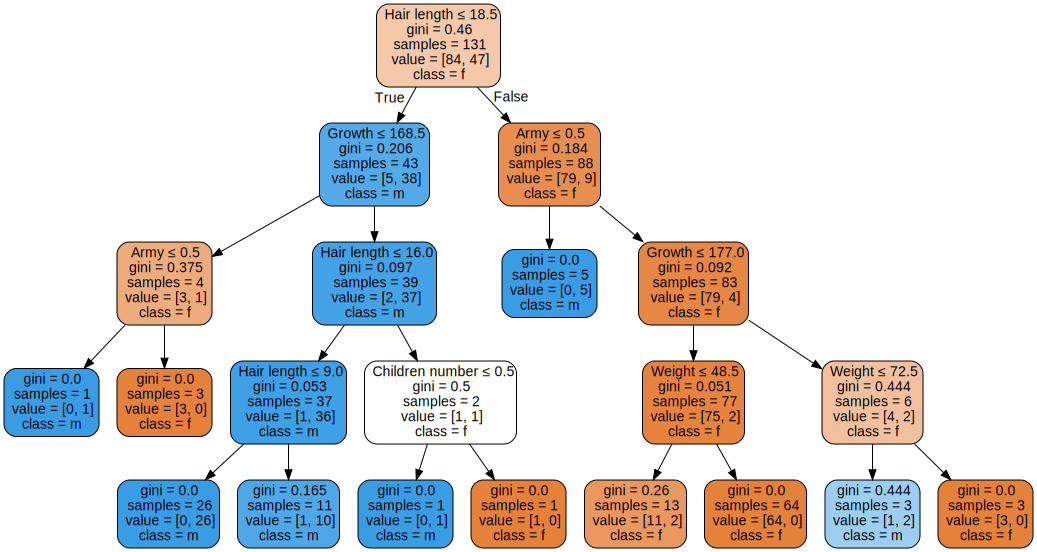

In [51]:
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=['Growth', 'Weight', 'Hair length', 'Children number', 'Coin', 'Animal', 'Army'],
                                class_names=['f', 'm'],
                                filled=True,
                                rounded=True,
                                special_characters=True
                                )
graph = graphviz.Source(dot_data)
graph

In [52]:
df_test_cut['Predicted Sex'] = model.predict(df_test_cut[['Growth', 'Weight', 'Hair length', 'Children number',
             'Coin', 'Animal', 'Army']])

In [53]:
pd.crosstab(df_test_cut['Predicted Sex'], df_test_cut['Sex'])

Sex,0,1
Predicted Sex,,
0,40,0
1,2,26


## Полезность признаков. One Hot Encoding

In [70]:
df = pd.read_csv('students.csv').dropna()

In [71]:
# Конвертируем все категориальные признаки в числовые
for col in df.select_dtypes(include=['object']):
    coder = coder.fit(df[col])
    df[col] = coder.transform(df[col])

In [74]:
selector = ExtraTreesClassifier()
result = selector.fit(df, df['Sex'])
result.feature_importances_

array([0.00552944, 0.06078325, 0.09580477, 0.00339971, 0.00467537,
       0.00263252, 0.00844824, 0.00524634, 0.01028643, 0.03071921,
       0.0008708 , 0.00299607, 0.00597535, 0.00144087, 0.00841529,
       0.00172149, 0.00581513, 0.00345501, 0.00353397, 0.00186048,
       0.00597489, 0.01298643, 0.007006  , 0.40593149, 0.005472  ,
       0.02749407, 0.00257978, 0.00351957, 0.00304761, 0.00192912,
       0.00318379, 0.00463365, 0.00429935, 0.00573323, 0.11261623,
       0.00148605, 0.07144811, 0.00455766, 0.00583344, 0.00366166,
       0.00478894, 0.00184848, 0.00595928, 0.00612745, 0.00466555,
       0.00323221, 0.01215005, 0.00422415])

In [76]:
features_table = pd.DataFrame(result.feature_importances_,
                              index=df.columns,
                              columns=['Importance'])\
                .sort_values(by='Importance', ascending=False)
features_table

,Importance
Sex,0.405931
Army,0.112616
Shoe size,0.095805
Hair length,0.071448
Growth,0.060783
Computer science rating,0.030719
Coin,0.027494
Weight,0.012986
Middle and ring finger,0.012150
Physics rating,0.010286


In [82]:
# 7 самых важных признаков
features_table.index[:7]

Index(['Sex', 'Army', 'Shoe size', 'Hair length', 'Growth',
       'Computer science rating', 'Coin'],
      dtype='object')

In [83]:
# Теперь, зная важность признаков, загрузим только важные признаки
# (без кнвертации категориальных признаков в чиловые)
df = pd.read_csv('students.csv')
df = df[features_table.index[:7]].dropna()
df

,Sex,Army,Shoe size,Hair length,Growth,Computer science rating,Coin
0,женский,не призовут (по разным причинам),40,50.0,170,84,Орел
1,мужской,не призовут (по разным причинам),43,7.0,191,72,Орел
2,мужской,могут призвать,41,4.0,172,0,Решка
3,женский,не призовут (по разным причинам),38,20.0,168,0,Решка
4,женский,не призовут (по разным причинам),36,55.0,159,0,Орел
...,...,...,...,...,...,...,...
181,женский,не призовут (по разным причинам),39,30.0,168,0,Решка
182,женский,не призовут (по разным причинам),38,45.0,169,0,Орел
183,женский,не призовут (по разным причинам),37,40.0,161,0,Орел
184,женский,не призовут (по разным причинам),41,150.0,169,0,Орел


In [84]:
# One Hot Encoding
# drop_first=True, чтобы удалить избыточные столбцы
df = pd.get_dummies(df, drop_first=True)
df

,Shoe size,Hair length,Growth,Computer science rating,Sex_мужской,Army_не призовут (по разным причинам),Coin_Решка
0,40,50.0,170,84,0,1,0
1,43,7.0,191,72,1,1,0
2,41,4.0,172,0,1,0,1
3,38,20.0,168,0,0,1,1
4,36,55.0,159,0,0,1,0
...,...,...,...,...,...,...,...
181,39,30.0,168,0,0,1,1
182,38,45.0,169,0,0,1,0
183,37,40.0,161,0,0,1,0
184,41,150.0,169,0,0,1,0


In [88]:
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(df.drop(columns=['Sex_мужской']), y=df['Sex_мужской'])

DecisionTreeClassifier(max_depth=4)

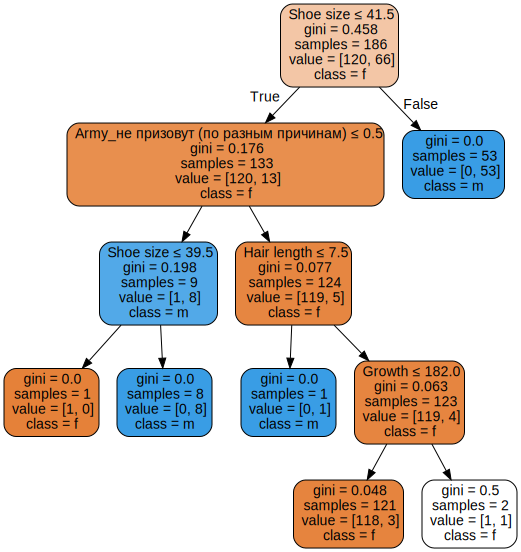

In [89]:
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=df.drop(columns=['Sex_мужской']).columns,
                                class_names=['f', 'm'],
                                filled=True,
                                rounded=True,
                                special_characters=True
                                )
graph = graphviz.Source(dot_data)
graph

In [95]:
# Проверка качества на тестовых данных
df_test = pd.read_csv('students_test.csv')
df_test = df_test[features_table.index[:7]].dropna()
df_test = pd.get_dummies(df_test, drop_first=True)
df_test

,Shoe size,Hair length,Growth,Computer science rating,Sex_мужской,Army_не призовут (по разным причинам),Coin_Решка
0,44.0,1.2,180.0,88,1,1,0
1,38.0,30.0,167.0,0,0,1,0
2,41.0,50.0,178.0,0,0,1,0
3,35.0,20.0,156.0,0,0,1,0
4,44.0,8.0,186.0,0,1,0,0
...,...,...,...,...,...,...,...
93,43.0,8.0,183.0,83,1,0,0
94,39.0,87.0,168.0,0,0,1,0
95,39.0,60.0,170.0,0,0,1,0
96,39.0,60.0,168.0,0,0,1,0


In [96]:
df_test['Predicted Sex'] = model.predict(df_test.drop(columns=['Sex_мужской']))

In [97]:
pd.crosstab(df_test['Predicted Sex'], df_test['Sex_мужской'])

Sex_мужской,0,1
Predicted Sex,,
0,61,0
1,1,36
